In [1]:
# Comment
#Observations


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('student.csv')
data.head() # for checking top 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# for checking last 5 rows
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [9]:
data.shape

(1000, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [13]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [14]:
[fea for fea in data.columns]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [17]:
cat_col = [fea for fea in data.columns  if data[fea].dtypes =='O'] # for getting obejct colunms

In [18]:
num_col = [fea for fea in data.columns  if data[fea].dtypes !='O'] # for getting numerical category column

In [19]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [20]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [21]:
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

In [24]:
# check the missing values
data.isnull().sum()  # here no values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [25]:
data.isnull().sum().sum() # sum of all above

0

In [27]:
# Duplicate values check  
data.duplicated().sum()  # Zero result means no duplicate

0

In [31]:
data.nunique() # we can check the unique no of values count in columns

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [32]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [33]:
# Statistical operations
data.describe()  # describe operation performs only on numerical category

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [34]:
data.describe().T # Min- to max will show the dispersion of the data.  Quartile and IQR

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [35]:
data.corr() # co-relation with respect to variables below are all in positive

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [36]:
data.cov() # relation of variable can be concluded

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [37]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

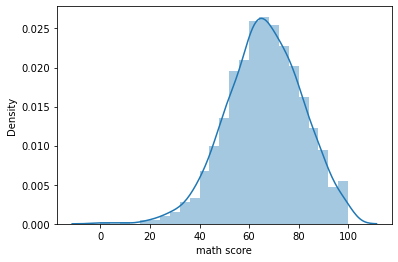

In [39]:
sns.distplot(data['math score'])

In [40]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [43]:
# here we are creating new colunm with average of 3 scores
data['average'] = (data['math score']+data['reading score']+data['writing score'])/3

In [44]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [46]:
# group by operations.
data.groupby('gender').mean()

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [47]:
# group by operations to count values
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [48]:
# Questions.
# No of student  having less than 30 in maths

In [52]:
data[data['math score']<30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
average                        14
dtype: int64

In [ ]:
p value

if p > 0.05

In [56]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average'],
      dtype='object')

In [59]:
data_num = data[num_col]

In [60]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [61]:
from scipy.stats import normaltest

In [62]:
normaltest(data_num['math score'])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

In [64]:
normaltest(data_num['math score'])[1]*100  # p value

0.04508029386993784

<AxesSubplot:xlabel='math score', ylabel='Density'>

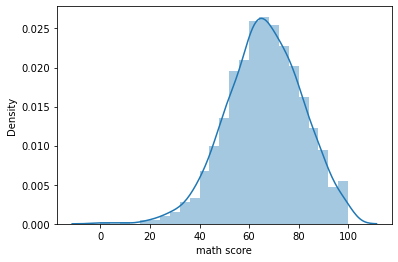

In [63]:
sns.distplot(data_num['math score'])

In [65]:
# outlier checking 
# We have to check upper and lower limit
# We havve to find IQR

<AxesSubplot:>

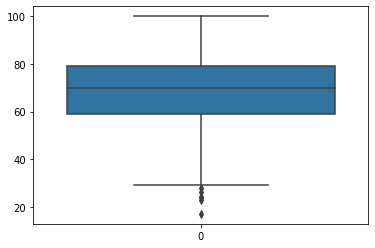

In [67]:
# box plot
sns.boxplot(data=data_num['reading score'])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

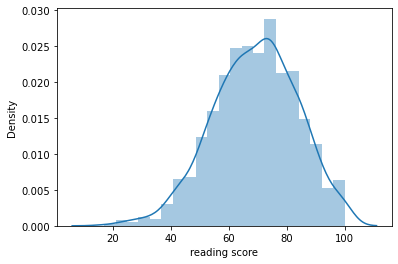

In [72]:
sns.distplot(data_num['reading score'])

<AxesSubplot:>

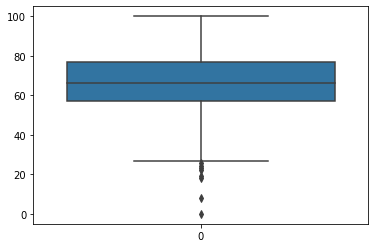

In [68]:
sns.boxplot(data=data_num['math score'])

<AxesSubplot:xlabel='math score', ylabel='Density'>

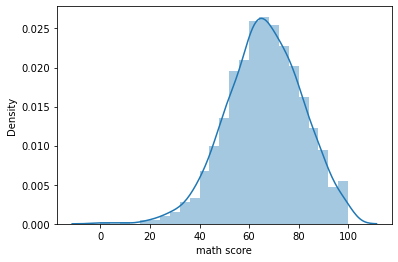

In [71]:
sns.distplot(data_num['math score'])

<AxesSubplot:>

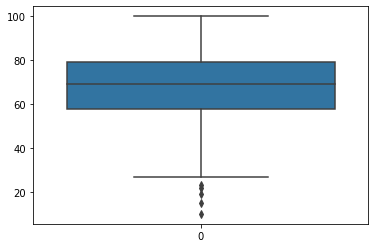

In [69]:
sns.boxplot(data=data_num['writing score'])

<AxesSubplot:xlabel='writing score', ylabel='Density'>

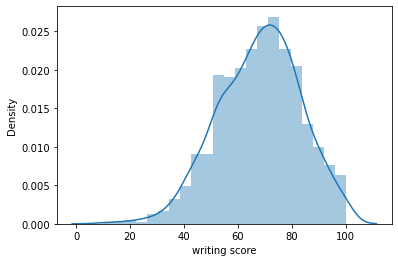

In [73]:
sns.distplot(data_num['writing score'])

In [75]:
data['math score'].quantile(0.10)

47.0

In [76]:
data['math score'].quantile(0.90)

86.0

In [77]:
data['math score'].min()

0

In [78]:
data['math score'].max()

100

In [80]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q2=df[variable].quantile(0.75)
    iqr=q2-q1
    up_limit=q2+(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit

In [81]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q2=df[variable].quantile(0.75)
    iqr=q2-q1
    up_limit=q2+(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit

In [83]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q2=df[variable].quantile(0.75)
    iqr=q2-q1
    up_limit=q2+(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit


In [84]:
for variable in data_num.columns:
    low_limit,upper_limit=outlier_threshold(data_num,variable)

In [86]:
def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        low_limit,upper_limit=outlier_threshold(data_num,variable)
        data.loc[data[variable]<low_limit,variable]=low_limit
        data.loc[data[variable]>high_limit,variable]=high_limit

In [87]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<AxesSubplot:xlabel='gender', ylabel='count'>

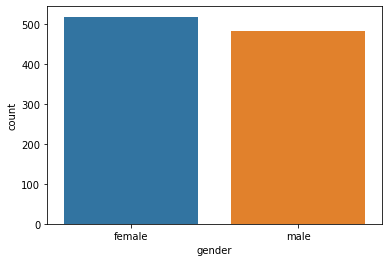

In [88]:
sns.countplot(data['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

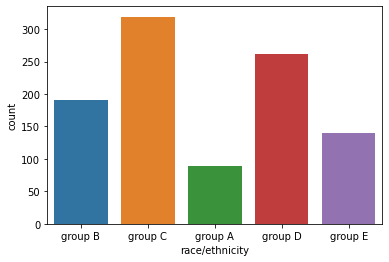

In [89]:
sns.countplot(data['race/ethnicity'])